# Cleaning U.S. Census Data

### Goals
We want to investigate the census to compare the difference between the races, sexes, and incomes across the US states.

Some of the visualizations we plan to get: 
1. Scatterplot that shows average income in a state vs proportion of women and men in that state
2. Histograms for the races data that you have

### Challenges


In [47]:
# Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import glob

# Upload all the csv files at once
files = glob.glob("states*.csv")

# Create an empty list for the files
states_list = []
# Loop through the files to get their data
for file in files:
    # Read the files with pandas
    data = pd.read_csv(file)
    # Append data to the list
    states_list.append(data)
# Concatenate the list into a dataframe with pandas
us_census = pd.concat(states_list)

In [46]:
# Check the column names and dtypes to convert them into the right types for manipulation
print(us_census.columns)
print(us_census.dtypes)

Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop', 'Men', 'Women'],
      dtype='object')
Unnamed: 0      int64
State          object
TotalPop        int64
Hispanic      float64
White         float64
Black         float64
Native        float64
Asian         float64
Pacific       float64
Income        float64
GenderPop      object
Men             int64
Women         float64
dtype: object


In [32]:
# See a preview of the dataframe to plan cleaning
us_census.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Rhode Island,1053661,13.36%,74.33%,5.68%,0.35%,3.25%,0.04%,"$59,125.27",510388M_543273F
1,1,South Carolina,4777576,5.06%,62.89%,28.75%,0.29%,1.25%,0.05%,"$46,296.81",2322409M_2455167F
2,2,South Dakota,843190,3.24%,82.50%,1.42%,9.42%,1.02%,0.04%,"$51,805.41",423477M_419713F
3,3,Tennessee,6499615,4.72%,73.49%,18.28%,0.23%,1.41%,0.04%,"$47,328.08",3167756M_3331859F
4,4,Texas,26538614,38.05%,44.69%,11.65%,0.26%,3.67%,0.07%,"$55,874.52",13171316M_13367298F


## Regex to the Rescue

5. Use regex to turn the `Income` column into a format that is ready for conversion into a numerical type.

In [33]:
for index in range(0, len(us_census["Income"])):
    string = str(us_census["Income"].iat[index])
    replace_dol = string.replace("$", "")
    replace_com = replace_dol.replace(",", "")
    us_census["Income"].iat[index] = replace_com

us_census["Income"] = pd.to_numeric(us_census["Income"])
us_census["Income"]

0    59125.27
1    46296.81
2    51805.41
3    47328.08
4    55874.52
5    63488.92
0    63488.92
1    55602.97
2    72866.01
3    64493.77
4    41437.11
5    53898.89
0    78765.40
1    72838.94
2    51201.83
3    62820.83
4    38909.92
5    49763.99
0    49763.99
1    47645.68
2    55916.47
3    55526.53
4    68728.86
5    76581.08
0    49655.25
1    48100.85
2    54271.90
3    56170.46
4    20720.54
5    59125.27
0    76581.08
1    47329.97
2    64290.75
3    49937.46
4    58188.11
5    49655.25
0    50811.08
1    73264.43
2    48017.32
3    59587.05
4    48616.23
5    53017.75
0    53017.75
1    53885.61
2    45285.80
3    44957.99
4    49181.97
5    78765.40
0    64657.80
1    76146.56
2    61827.98
3    75466.36
4    50690.19
5    50811.08
0    43296.36
1    70354.74
2    54207.82
3    41935.63
4    67264.78
5    64657.80
Name: Income, dtype: float64

6. Look at the `GenderPop` column. We are going to want to separate this into two columns, the `Men` column, and the `Women` column.

   Split the column into those two new columns using `str.split` and separating out those results.

In [34]:
us_census["GenderPop"].head()

Men = []
Women = []

for index in range(0, len(us_census["GenderPop"])):
    string = str(us_census["GenderPop"].iat[index])
    split = string.split("_")
    Men.append(split[0])
    Women.append(split[1])

us_census["Men"] = Men
us_census["Women"] = Women

us_census.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Men,Women
0,0,Rhode Island,1053661,13.36%,74.33%,5.68%,0.35%,3.25%,0.04%,59125.27,510388M_543273F,510388M,543273F
1,1,South Carolina,4777576,5.06%,62.89%,28.75%,0.29%,1.25%,0.05%,46296.81,2322409M_2455167F,2322409M,2455167F
2,2,South Dakota,843190,3.24%,82.50%,1.42%,9.42%,1.02%,0.04%,51805.41,423477M_419713F,423477M,419713F
3,3,Tennessee,6499615,4.72%,73.49%,18.28%,0.23%,1.41%,0.04%,47328.08,3167756M_3331859F,3167756M,3331859F
4,4,Texas,26538614,38.05%,44.69%,11.65%,0.26%,3.67%,0.07%,55874.52,13171316M_13367298F,13171316M,13367298F


7. Convert both of the columns into numerical datatypes.

   There is still an `M` or an `F` character in each entry! We should remove those before we convert.

In [35]:
for index in range(0, len(us_census["Men"])): 
    string = str(us_census["Men"].iat[index])
    replace_M = string.replace("M", "")
    us_census["Men"].iat[index] = replace_M

for index in range(0, len(us_census["Women"])):
    string = str(us_census["Women"].iat[index])
    replace_F = string.replace("F", "")
    us_census["Women"].iat[index] = replace_F

us_census["Men"] = pd.to_numeric(us_census["Men"])
us_census["Women"] = pd.to_numeric(us_census["Women"])

us_census.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Men,Women
0,0,Rhode Island,1053661,13.36%,74.33%,5.68%,0.35%,3.25%,0.04%,59125.27,510388M_543273F,510388,543273.0
1,1,South Carolina,4777576,5.06%,62.89%,28.75%,0.29%,1.25%,0.05%,46296.81,2322409M_2455167F,2322409,2455167.0
2,2,South Dakota,843190,3.24%,82.50%,1.42%,9.42%,1.02%,0.04%,51805.41,423477M_419713F,423477,419713.0
3,3,Tennessee,6499615,4.72%,73.49%,18.28%,0.23%,1.41%,0.04%,47328.08,3167756M_3331859F,3167756,3331859.0
4,4,Texas,26538614,38.05%,44.69%,11.65%,0.26%,3.67%,0.07%,55874.52,13171316M_13367298F,13171316,13367298.0


9. You want to double check your work. You know from experience that these monstrous csv files probably have `nan` values in them! Print out your column with the number of women per state to see.

   We can fill in those `nan`s by using pandas' `.fillna()` function.
   
   You have the `TotalPop` per state, and you have the `Men` per state. As an estimate for the `nan` values in the `Women` column, you could use the `TotalPop` of that state minus the `Men` for that state.
   
   Print out the `Women` column after filling the `nan` values to see if it worked!

In [43]:
us_census["Women"] = us_census["Women"].fillna(us_census["TotalPop"] - us_census["Men"])

10. We forgot to check for duplicates! Use `.duplicated()` on your `census` DataFrame to see if we have duplicate rows in there.

In [44]:
us_census.duplicated(subset=us_census.columns[1:])

0    False
1    False
2    False
3    False
4    False
5    False
0     True
1    False
2    False
3    False
4    False
5    False
0    False
1    False
2    False
3    False
4    False
5    False
0     True
1    False
2    False
3    False
4    False
5    False
0    False
1    False
2    False
3    False
4    False
5     True
0     True
1    False
2    False
3    False
4    False
5     True
0    False
1    False
2    False
3    False
4    False
5    False
0     True
1    False
2    False
3    False
4    False
5     True
0    False
1    False
2    False
3    False
4    False
5     True
0    False
1    False
2    False
3    False
4    False
5     True
dtype: bool

In [45]:
# Drop the duplicates
census = us_census.drop_duplicates(subset=us_census.columns[1:])
census.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Men,Women
0,0,Rhode Island,1053661,13.36,74.33,5.68,0.35,3.25,0.04,59125.27,510388M_543273F,510388,543273.0
1,1,South Carolina,4777576,5.06,62.89,28.75,0.29,1.25,0.05,46296.81,2322409M_2455167F,2322409,2455167.0
2,2,South Dakota,843190,3.24,82.50,1.42,9.42,1.02,0.04,51805.41,423477M_419713F,423477,419713.0
3,3,Tennessee,6499615,4.72,73.49,18.28,0.23,1.41,0.04,47328.08,3167756M_3331859F,3167756,3331859.0
4,4,Texas,26538614,38.05,44.69,11.65,0.26,3.67,0.07,55874.52,13171316M_13367298F,13171316,13367298.0


12. Make the scatterplot again. Now, it should be perfect! Your job is secure, for now.

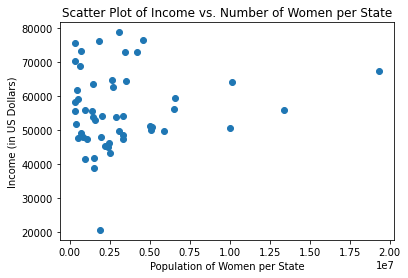

<Figure size 432x288 with 0 Axes>

In [39]:
plt.scatter(census['Women'], census['Income'])
plt.title("Scatter Plot of Income vs. Number of Women per State")
plt.xlabel("Population of Women per State")
plt.ylabel("Income (in US Dollars)")
plt.show()
plt.clf()


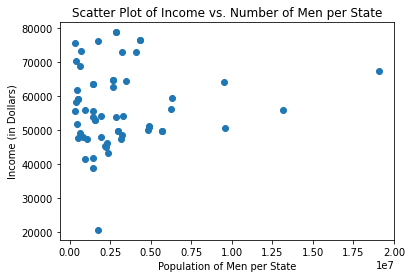

<Figure size 432x288 with 0 Axes>

In [40]:
plt.scatter(us_census["Men"], us_census["Income"])
plt.title("Scatter Plot of Income vs. Number of Men per State")
plt.xlabel("Population of Men per State")
plt.ylabel("Income (in Dollars)")
plt.show()
plt.clf()

In [41]:
# Find all the races
census.columns

Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop', 'Men', 'Women'],
      dtype='object')

14. Try to make a histogram for each one!

    You will have to get the columns into the numerical format, and those percentage signs will have to go.
    
    Don't forget to fill the `nan` values with something that makes sense! You probably dropped the duplicate rows when making your last graph, but it couldn't hurt to check for duplicates again.

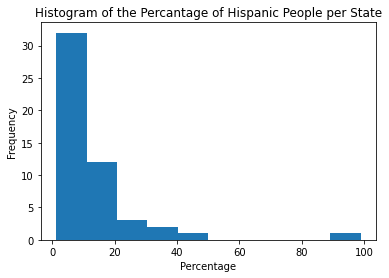

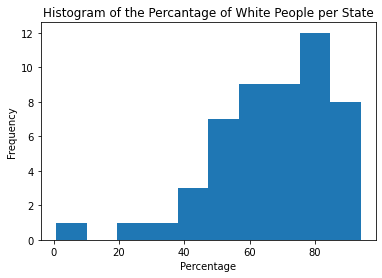

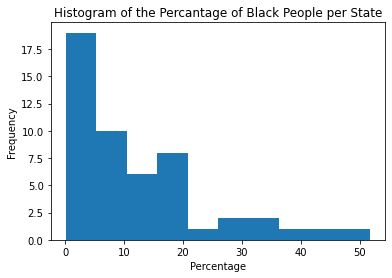

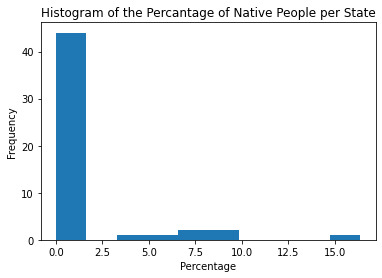

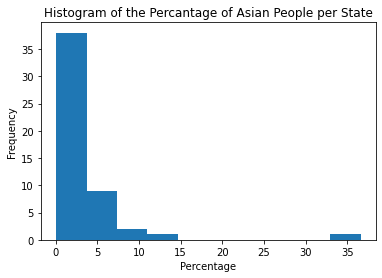

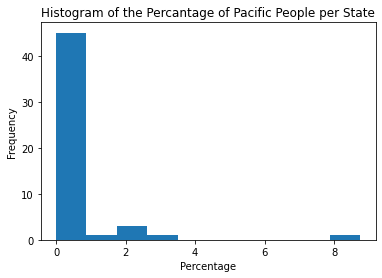

<Figure size 432x288 with 0 Axes>

In [42]:
for race in ["Hispanic", "White", "Black", "Native", "Asian", "Pacific"]:
    for index in range(0, len(us_census)):
        string = str(us_census[race].iat[index])
        replace = string.replace("%", "")
        if (replace == "nan"):
            replace = ""
        us_census[race].iat[index] = replace
    us_census[race] = pd.to_numeric(us_census[race])

us_census["Pacific"] = us_census["Pacific"].fillna(100 - us_census["Hispanic"] - us_census["White"] - us_census["Black"] - us_census["Native"] - us_census["Asian"])

census = us_census.drop_duplicates(subset=us_census.columns[1:])
census

for race in ["Hispanic", "White", "Black", "Native", "Asian", "Pacific"]:
    plt.hist(census[race])
    plt.title("Histogram of the Percantage of {} People per State".format(race))
    plt.xlabel("Percentage")
    plt.ylabel("Frequency")
    plt.show()
    plt.clf()